In [ ]:
!pip install torchvision

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader ,Dataset
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

In [2]:
train_row_dataset = torchvision.datasets.MNIST(root = "./data" , train = True ,download= True)
test_row_dataset = torchvision.datasets.MNIST(root = "./data" , train = False ,download= True)

In [3]:
train_row_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

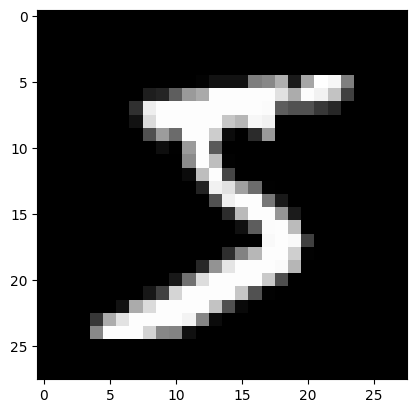

In [4]:
plt.imshow(train_row_dataset.data[0],cmap='gray')

In [5]:
train_row_dataset.data.shape

torch.Size([60000, 28, 28])

In [6]:
test_row_dataset.data.size()

torch.Size([10000, 28, 28])

In [7]:
train_row_dataset.targets[0]

tensor(5)

In [8]:
train_row_dataset.data[0].shape

torch.Size([28, 28])

In [9]:
class customdataset(Dataset):
  def __init__(self,data,target,transform = None):
    self.data = data
    self.target = target
    self.transform = transform

  def __len__(self):
    return len(self.data)

  def __getitem__(self,idx):
    data = self.data[idx].numpy()
    img = Image.fromarray(data, mode='L')
    target = self.target[idx]

    if self.transform:
      img = self.transform(img)

    return img,target



In [10]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5,))
])


In [11]:
train_dataset = customdataset(train_row_dataset.data,train_row_dataset.targets,transform)
test_dataset = customdataset(test_row_dataset.data,test_row_dataset.targets,transform)

In [12]:
train_dataloder = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_dataloder = DataLoader(test_dataset,batch_size=64,shuffle=True)

2


/tmp/ipython-input-471289643.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(data, mode='L')


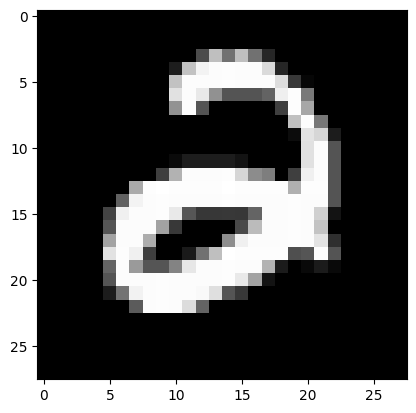

In [13]:
for image , label in train_dataloder:
  plt.imshow(image[0].squeeze() ,cmap="gray")
  print(label[0].item())
  break

In [19]:
class LeNetArch(nn.Module):
  def __init__(self):
    super(LeNetArch,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5,stride=1,padding=2)
    self.relu = nn.ReLU()
    self.pool = nn.AvgPool2d(kernel_size=2 , stride=2)
    self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1)
    self.gap = nn.AdaptiveAvgPool2d((1, 1))

    self.fc1 = nn.Linear(in_features=16,out_features=120)
    self.fc2 = nn.Linear(in_features=120,out_features=84)
    self.fc3 = nn.Linear(in_features=84,out_features=10)

  def forward(self,x):
    x=self.pool(self.relu(self.conv1(x)))
    x=self.pool(self.relu(self.conv2(x)))
    x = self.gap(x)
    x = x.view(x.size(0),-1) # flatten
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)

    return x


In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model =  LeNetArch().to(device)


In [21]:
print(model)

LeNetArch(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc1): Linear(in_features=16, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [29]:
from torch.optim.optimizer import Optimizer
# training loop

epochs = 30

for epoch in range(epochs):
  model.train()
  running_loss = 0
  for image , label in tqdm(train_dataloder,desc="batch"):
    image,label = image.to(device),label.to(device)

    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output , label)

    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  epoch_loss = running_loss / len(train_dataloder)

  print(f"Epoch {epoch+1}/{epochs} , Loss {epoch_loss:.4f}")


batch:   0%|          | 0/938 [00:00<?, ?it/s]/tmp/ipython-input-471289643.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(data, mode='L')
batch: 100%|██████████| 938/938 [00:15<00:00, 59.35it/s]


Epoch 1/30 , Loss 0.0947


batch: 100%|██████████| 938/938 [00:16<00:00, 58.15it/s]


Epoch 2/30 , Loss 0.0909


batch: 100%|██████████| 938/938 [00:16<00:00, 57.52it/s]


Epoch 3/30 , Loss 0.0861


batch: 100%|██████████| 938/938 [00:15<00:00, 59.16it/s]


Epoch 4/30 , Loss 0.0852


batch: 100%|██████████| 938/938 [00:16<00:00, 58.06it/s]


Epoch 5/30 , Loss 0.0821


batch: 100%|██████████| 938/938 [00:16<00:00, 57.76it/s]


Epoch 6/30 , Loss 0.0753


batch: 100%|██████████| 938/938 [00:15<00:00, 60.42it/s]


Epoch 7/30 , Loss 0.0731


batch: 100%|██████████| 938/938 [00:15<00:00, 59.23it/s]


Epoch 8/30 , Loss 0.0720


batch: 100%|██████████| 938/938 [00:16<00:00, 57.29it/s]


Epoch 9/30 , Loss 0.0685


batch: 100%|██████████| 938/938 [00:15<00:00, 59.61it/s]


Epoch 10/30 , Loss 0.0662


batch: 100%|██████████| 938/938 [00:15<00:00, 60.25it/s]


Epoch 11/30 , Loss 0.0643


batch: 100%|██████████| 938/938 [00:16<00:00, 57.63it/s]


Epoch 12/30 , Loss 0.0622


batch: 100%|██████████| 938/938 [00:15<00:00, 60.49it/s]


Epoch 13/30 , Loss 0.0596


batch: 100%|██████████| 938/938 [00:15<00:00, 59.51it/s]


Epoch 14/30 , Loss 0.0586


batch: 100%|██████████| 938/938 [00:17<00:00, 53.50it/s]


Epoch 15/30 , Loss 0.0564


batch: 100%|██████████| 938/938 [00:16<00:00, 55.54it/s]


Epoch 16/30 , Loss 0.0568


batch: 100%|██████████| 938/938 [00:17<00:00, 54.44it/s]


Epoch 17/30 , Loss 0.0543


batch: 100%|██████████| 938/938 [00:17<00:00, 53.04it/s]


Epoch 18/30 , Loss 0.0522


batch: 100%|██████████| 938/938 [00:16<00:00, 56.35it/s]


Epoch 19/30 , Loss 0.0518


batch: 100%|██████████| 938/938 [00:16<00:00, 57.00it/s]


Epoch 20/30 , Loss 0.0483


batch: 100%|██████████| 938/938 [00:15<00:00, 59.76it/s]


Epoch 21/30 , Loss 0.0483


batch: 100%|██████████| 938/938 [00:15<00:00, 59.53it/s]


Epoch 22/30 , Loss 0.0467


batch: 100%|██████████| 938/938 [00:15<00:00, 58.80it/s]


Epoch 23/30 , Loss 0.0471


batch: 100%|██████████| 938/938 [00:16<00:00, 58.44it/s]


Epoch 24/30 , Loss 0.0452


batch: 100%|██████████| 938/938 [00:15<00:00, 60.93it/s]


Epoch 25/30 , Loss 0.0445


batch: 100%|██████████| 938/938 [00:15<00:00, 60.52it/s]


Epoch 26/30 , Loss 0.0437


batch: 100%|██████████| 938/938 [00:16<00:00, 58.47it/s]


Epoch 27/30 , Loss 0.0419


batch: 100%|██████████| 938/938 [00:15<00:00, 60.89it/s]


Epoch 28/30 , Loss 0.0413


batch: 100%|██████████| 938/938 [00:15<00:00, 60.54it/s]


Epoch 29/30 , Loss 0.0425


batch: 100%|██████████| 938/938 [00:15<00:00, 59.69it/s]

Epoch 30/30 , Loss 0.0388


In [31]:

model.eval()
total_correct = 0
total_Sample = 0
with torch.no_grad():
  for image , label in tqdm(test_dataloder,desc="batch"):
    image = image.to(device)
    label = label.to(device)

    output = model(image)

    _,predict = torch.max(output,1)

    total_correct += (predict == label).sum().item()
    total_Sample += label.size(0)

accuracy = 100*total_correct / total_Sample

print(f"Accuracy : {accuracy:.2f}%")



batch:   0%|          | 0/157 [00:00<?, ?it/s]/tmp/ipython-input-471289643.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(data, mode='L')
batch: 100%|██████████| 157/157 [00:02<00:00, 60.32it/s]

Accuracy : 98.34%


In [32]:
# inference


In [33]:
torch.save(model.state_dict(),"model.pth")

In [41]:
class imageClassifier:
  def __init__(self,model_path):
    self.model_path = model_path
    self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.model = LeNetArch().to(self.device)
    self.model.load_state_dict(torch.load(self.model_path))

    self.model.eval()
    self.transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5,))
    ])

  def predict(self,image_path):
    image = Image.open(image_path).convert("L")
    input_tensor  = self.transform(image).unsqueeze(0).to(self.device)

    with torch.no_grad():
      output = self.model(input_tensor)

    _,predict = torch.max(output,1)

    return predict.item()





In [ ]:
inferencemodel = imageClassifier("/content/model.pth")
prediction=inferencemodel.predict("/content/test.png")

In [43]:
print(prediction)

3
